In [1]:
# Yernar Shambayev, DL-2
# 1. Постройте наивный баессовский классификатор для датасета MNIST (так же есть в торче).
#    Классификатор строить только для двух цифр (1 и 2).
# 2. Оцените качество полученного классификатора на тестовой выборке
# 3. Выведите 10 ошибок предсказания

import torch
import torchvision.datasets as datasets
from torch.utils.data import Subset
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def transform(data):
    data = torch.tensor(data.getdata(), dtype=torch.float32)
    return torch.floor(data / 128.).squeeze(axis=-1)

def get_indices(data):
    indices = []
    for i in range(len(data)):
        current_class = data[i][1]
        if current_class == 1 or current_class == 2:
            indices.append(i)
    return indices

def filter_data(data):
    filtered_dataset = Subset(data, get_indices(data))

    loader = DataLoader(filtered_dataset, batch_size=len(filtered_dataset))
    features_array = next(iter(loader))[0]
    labels_array = next(iter(loader))[1]

    return features_array, labels_array

def num_zeros(data):
    count = (data == 0).sum(dim=0)
    return count.item()

In [3]:
mnist_train = datasets.MNIST('.', train=True, transform=transform, download=True)
mnist_test  = datasets.MNIST('.', train=False, transform=transform, download=True)

In [4]:
# Фильтрация данных (оставляем только 1 и 2)
train_features, train_labels = filter_data(mnist_train)
test_features, test_labels = filter_data(mnist_test)

print(train_features.shape, train_labels.shape)
print(train_labels)
print(test_features.shape, test_labels.shape)
print(test_labels)

torch.Size([12700, 784]) torch.Size([12700])
tensor([1, 2, 1,  ..., 2, 2, 1])
torch.Size([2167, 784]) torch.Size([2167])
tensor([2, 1, 1,  ..., 2, 1, 2])


In [5]:
# Вероятности 1 и 2 из тренировочного набора данных
prob1 = (train_labels == 1).sum().item() / len(train_labels)
prob2 = (train_labels == 2).sum().item() / len(train_labels)
print(prob1, prob2)

0.5308661417322834 0.46913385826771653


In [6]:
# Тест
lucky = 0
missed = []
for i in range(len(test_features)):
    num = num_zeros(test_features[i])
    if num >= 700:
        coeff = 2
    else:
        coeff = 0.5
    prob_pred1 = prob1 * coeff / prob2
    prob_pred2 = prob2 / (prob1 * coeff)

    predicted = 1 if prob_pred1 >= prob_pred2 else 2
    if predicted == test_labels[i].item():
        lucky += 1
    else:
        missed.append(i)

print(f'Accuracy: { lucky / len(test_features)}')

Accuracy: 0.8860175357637287


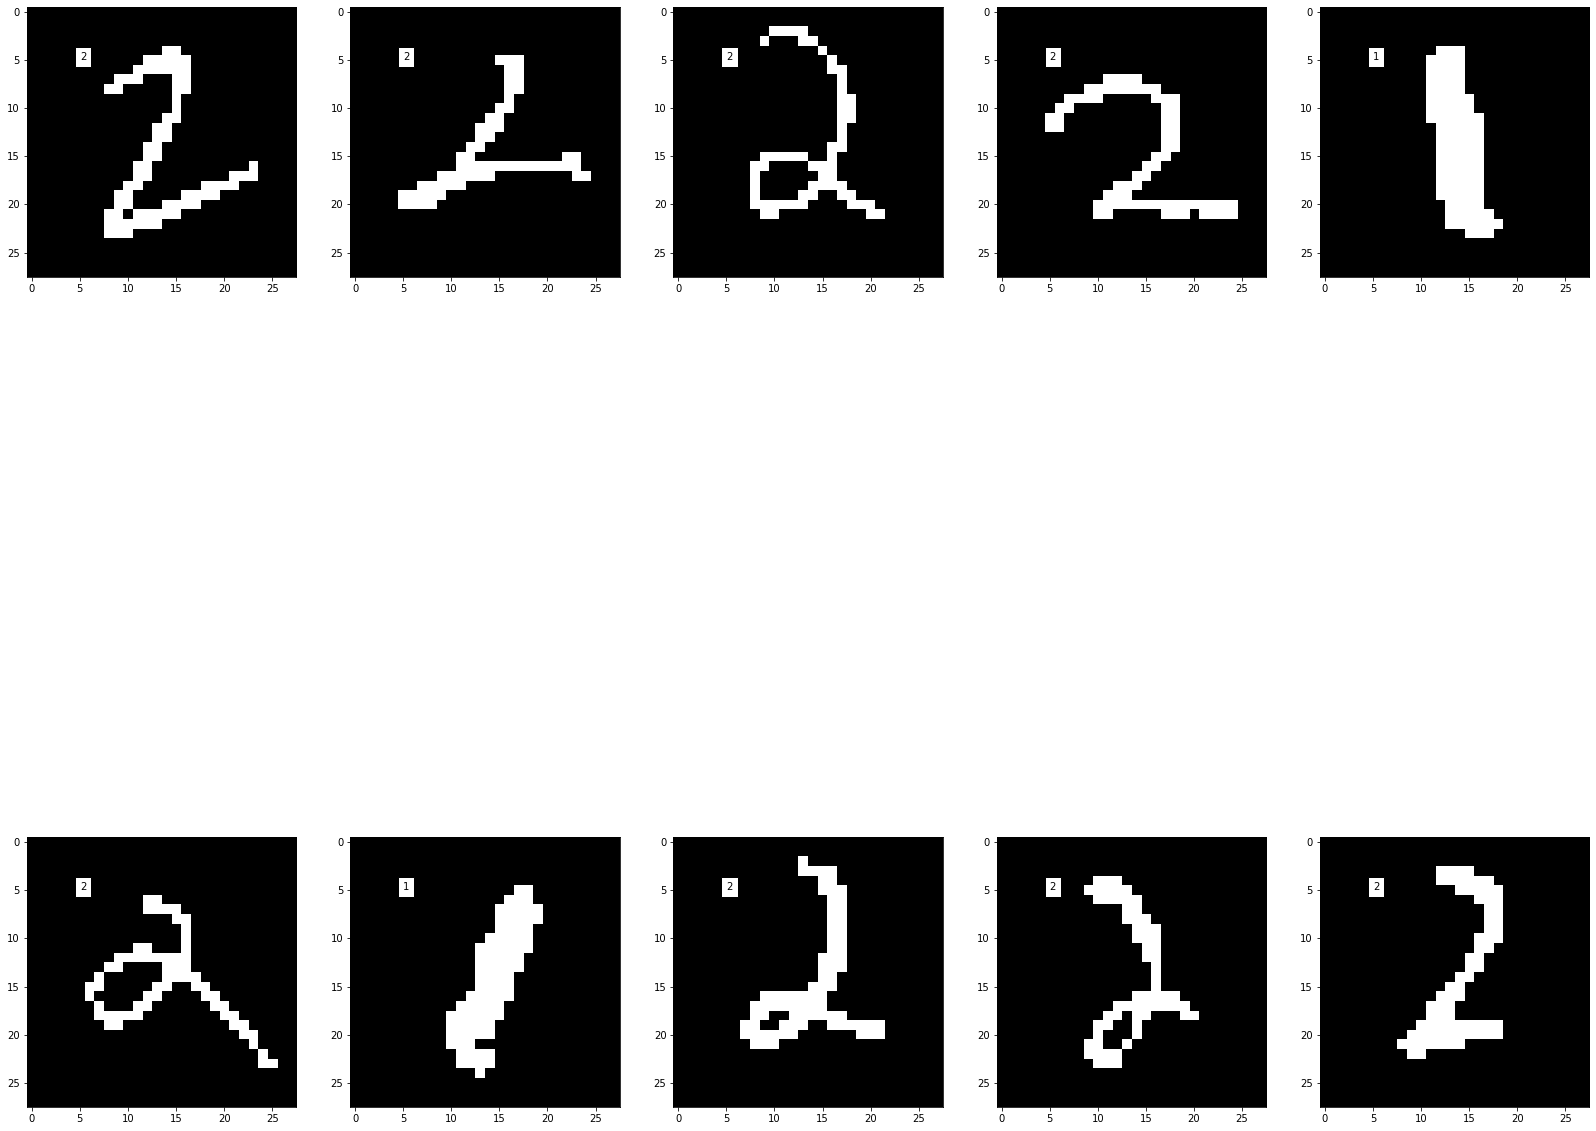

In [7]:
# 10 ошибок предсказания 
plt.figure(figsize=(28,28))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.text(5, 5, test_labels[missed[i]].item(), bbox={'facecolor': 'white', 'pad': 5})
    plt.imshow(test_features[missed[i]].reshape(28, 28), cmap = 'gray') 